In [1]:
#!/usr/bin/env python
# coding: utf-8


import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from keras.layers.core import Dense, Activation, Dropout
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt



df = pd.read_csv('dataset.csv')



df.head()


# In[8]:


df.columns


# In[15]:


df[' 역명 ']


# In[17]:


s = df[' 역명 ']


# In[19]:


s = set(s)


# In[20]:


len(s)


# In[24]:


s = list(s)
# s = list(set(df[' 역명 ']))


# In[25]:


s


# In[35]:


data1 = df[df[' 역명 ']==s[0]]


# In[36]:


data1


# In[37]:


data1_a = data1[' 05~06 ']


# In[38]:


data1_a


# In[45]:


data1_a = data1[' 05~06 '].values


# In[46]:


type(data1_a)


# In[48]:


data1_a = data1_a.reshape(len(data1_a), 1)
data1_a


# In[63]:


# 데이터셋 전처리
scaler = MinMaxScaler(feature_range=(0, 1))
signal_data = scaler.fit_transform(data1_a)


# In[54]:


train_size = int(len(signal_data) * 0.80)
test_size = len(signal_data) - train_size


# In[56]:


train = signal_data[0:train_size]
test = signal_data[train_size:len(signal_data)]


# In[59]:


def create_dataset(signal_data, look_back=1):
    dataX, dataY = [], []
    for i in range(len(signal_data) - look_back):
        dataX.append(signal_data[i:(i + look_back), 0])
        dataY.append(signal_data[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

look_back = 10


# In[60]:


x_train, y_train = create_dataset(train, look_back)
x_test, y_test = create_dataset(test, look_back)


# In[61]:


x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))


# In[64]:


# 모델 구성하기
model = Sequential()
model.add(LSTM(32, input_shape=(None, 1)))
model.add(Dropout(0.3))
model.add(Dense(1))


# In[71]:


# 모델 학습과정 설정하기
model.compile(loss='mean_squared_error', optimizer='rmsprop', metrics=['accuracy'])


# In[72]:


# 모델 학습시키기
hist = model.fit(x_train, y_train, epochs=10, batch_size=32)


# In[73]:


# 모델 평가하기
trainScore = model.evaluate(x_train, y_train, verbose=0)
model.reset_states()
print('Train Score: ', trainScore)

testScore = model.evaluate(x_test, y_test, verbose=0)
model.reset_states()
print('Test Score: ', testScore)


# In[74]:


# 정확도 그리기.
p = model.predict(x_test)


# In[75]:


import matplotlib.pyplot as plt

plt.plot(y_test)
plt.plot(p)
plt.legend(['testY', 'p'], loc='upper right')
plt.show()


# In[ ]:


Using TensorFlow backend.
D:\Anaconda3\envs\me\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


Epoch 1/10
5394/5394 [==============================] - 25s 5ms/step - loss: 0.0624 - acc: 1.8539e-04
Epoch 2/10
5394/5394 [==============================] - 4s 689us/step - loss: 0.0449 - acc: 1.8539e-04
Epoch 3/10
5394/5394 [==============================] - 3s 464us/step - loss: 0.0340 - acc: 1.8539e-04
Epoch 4/10
5394/5394 [==============================] - 3s 509us/step - loss: 0.0269 - acc: 1.8539e-04
Epoch 5/10
5394/5394 [==============================] - 3s 496us/step - loss: 0.0236 - acc: 3.7078e-04
Epoch 6/10
5394/5394 [==============================] - 3s 501us/step - loss: 0.0217 - acc: 1.8539e-04
Epoch 7/10
5394/5394 [==============================] - 3s 488us/step - loss: 0.0199 - acc: 1.8539e-04
Epoch 8/10
5394/5394 [==============================] - 2s 463us/step - loss: 0.0179 - acc: 3.7078e-04
Epoch 9/10
5394/5394 [==============================] - 3s 517us/step - loss: 0.0171 - acc: 3.7078e-04
Epoch 10/10
5394/5394 [==============================] - 3s 528us/step - l

<Figure size 640x480 with 1 Axes>

In [7]:
data_model = []

for time in data1.columns:
    data = data1[time]
    data = data.values
    data = data.reshape(len(data), 1)
    
    scaler = MinMaxScaler(feature_range=(0, 1))
    data = scaler.fit_transform(data)
    
    train_size = int(len(signal_data) * 0.80)
    test_size = len(signal_data) - train_size
    
    x_train, y_train = create_dataset(train, look_back)
    x_test, y_test = create_dataset(test, look_back)
    
    x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
    x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
    # 모델 구성하기
    model = Sequential()
    model.add(LSTM(32, input_shape=(None, 1)))
    model.add(Dropout(0.3))
    model.add(Dense(1))
    
    # 모델 학습과정 설정하기
    model.compile(loss='mean_squared_error', optimizer='rmsprop', metrics=['accuracy'])
    hist = model.fit(x_train, y_train, epochs=10, batch_size=32)
    data_model.append(hist)

D:\Anaconda3\envs\me\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


Epoch 1/10
5394/5394 [==============================] - 3s 612us/step - loss: 0.0630 - acc: 1.8539e-04
Epoch 2/10
5394/5394 [==============================] - 2s 460us/step - loss: 0.0412 - acc: 1.8539e-04
Epoch 3/10
5394/5394 [==============================] - 2s 459us/step - loss: 0.0258 - acc: 1.8539e-04
Epoch 4/10
5394/5394 [==============================] - 2s 462us/step - loss: 0.0226 - acc: 3.7078e-04
Epoch 5/10
5394/5394 [==============================] - 3s 466us/step - loss: 0.0205 - acc: 3.7078e-04
Epoch 6/10
5394/5394 [==============================] - 3s 514us/step - loss: 0.0192 - acc: 3.7078e-04
Epoch 7/10
5394/5394 [==============================] - 3s 478us/step - loss: 0.0166 - acc: 3.7078e-04
Epoch 8/10
5394/5394 [==============================] - 3s 469us/step - loss: 0.0160 - acc: 3.7078e-04
Epoch 9/10
5394/5394 [==============================] - 3s 493us/step - loss: 0.0152 - acc: 1.8539e-04
Epoch 10/10
5394/5394 [==============================] - 3s 466us/step - 

D:\Anaconda3\envs\me\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


Epoch 1/10
5394/5394 [==============================] - 4s 666us/step - loss: 0.0632 - acc: 1.8539e-04
Epoch 2/10
5394/5394 [==============================] - 3s 464us/step - loss: 0.0373 - acc: 1.8539e-04
Epoch 3/10
5394/5394 [==============================] - 3s 474us/step - loss: 0.0238 - acc: 1.8539e-04
Epoch 4/10
5394/5394 [==============================] - 3s 576us/step - loss: 0.0208 - acc: 3.7078e-04
Epoch 5/10
5394/5394 [==============================] - 3s 570us/step - loss: 0.0180 - acc: 3.7078e-04
Epoch 6/10
5394/5394 [==============================] - 3s 544us/step - loss: 0.0169 - acc: 1.8539e-04
Epoch 7/10
5394/5394 [==============================] - 4s 649us/step - loss: 0.0159 - acc: 3.7078e-04
Epoch 8/10
5394/5394 [==============================] - 3s 616us/step - loss: 0.0149 - acc: 1.8539e-04
Epoch 9/10
5394/5394 [==============================] - 4s 746us/step - loss: 0.0142 - acc: 3.7078e-04
Epoch 10/10
5394/5394 [==============================] - 3s 466us/step - 

D:\Anaconda3\envs\me\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


Epoch 1/10
5394/5394 [==============================] - 3s 641us/step - loss: 0.0630 - acc: 1.8539e-04
Epoch 2/10
5394/5394 [==============================] - 3s 474us/step - loss: 0.0329 - acc: 1.8539e-04
Epoch 3/10
5394/5394 [==============================] - 3s 473us/step - loss: 0.0221 - acc: 3.7078e-04
Epoch 4/10
5394/5394 [==============================] - 4s 770us/step - loss: 0.0187 - acc: 3.7078e-04
Epoch 5/10
5394/5394 [==============================] - 3s 499us/step - loss: 0.0173 - acc: 3.7078e-04
Epoch 6/10
5394/5394 [==============================] - 3s 487us/step - loss: 0.0160 - acc: 3.7078e-04
Epoch 7/10
5394/5394 [==============================] - 3s 488us/step - loss: 0.0151 - acc: 1.8539e-04
Epoch 8/10
5394/5394 [==============================] - 3s 494us/step - loss: 0.0145 - acc: 3.7078e-04
Epoch 9/10
5394/5394 [==============================] - 3s 502us/step - loss: 0.0138 - acc: 3.7078e-04
Epoch 10/10
5394/5394 [==============================] - 3s 495us/step - 

D:\Anaconda3\envs\me\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


Epoch 1/10
5394/5394 [==============================] - 4s 695us/step - loss: 0.0629 - acc: 1.8539e-04
Epoch 2/10
5394/5394 [==============================] - 3s 484us/step - loss: 0.0387 - acc: 1.8539e-04
Epoch 3/10
5394/5394 [==============================] - 3s 490us/step - loss: 0.0238 - acc: 3.7078e-04
Epoch 4/10
5394/5394 [==============================] - 3s 485us/step - loss: 0.0203 - acc: 3.7078e-04
Epoch 5/10
5394/5394 [==============================] - 3s 483us/step - loss: 0.0176 - acc: 3.7078e-04
Epoch 6/10
5394/5394 [==============================] - 3s 473us/step - loss: 0.0166 - acc: 3.7078e-04
Epoch 7/10
5394/5394 [==============================] - 3s 477us/step - loss: 0.0157 - acc: 3.7078e-04
Epoch 8/10
5394/5394 [==============================] - 3s 571us/step - loss: 0.0146 - acc: 3.7078e-04
Epoch 9/10
5394/5394 [==============================] - 3s 579us/step - loss: 0.0142 - acc: 3.7078e-04
Epoch 10/10
5394/5394 [==============================] - 4s 664us/step - 

D:\Anaconda3\envs\me\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


Epoch 1/10
5394/5394 [==============================] - 5s 855us/step - loss: 0.0647 - acc: 1.8539e-04
Epoch 2/10
5394/5394 [==============================] - 3s 485us/step - loss: 0.0364 - acc: 1.8539e-04
Epoch 3/10
5394/5394 [==============================] - 3s 567us/step - loss: 0.0232 - acc: 1.8539e-04
Epoch 4/10
5394/5394 [==============================] - 3s 528us/step - loss: 0.0203 - acc: 1.8539e-04
Epoch 5/10
5394/5394 [==============================] - 3s 484us/step - loss: 0.0182 - acc: 1.8539e-04
Epoch 6/10
5394/5394 [==============================] - 3s 486us/step - loss: 0.0167 - acc: 1.8539e-04
Epoch 7/10
5394/5394 [==============================] - 3s 519us/step - loss: 0.0156 - acc: 3.7078e-04
Epoch 8/10
5394/5394 [==============================] - 3s 495us/step - loss: 0.0148 - acc: 3.7078e-04
Epoch 9/10
5394/5394 [==============================] - 3s 499us/step - loss: 0.0144 - acc: 3.7078e-04
Epoch 10/10
5394/5394 [==============================] - 3s 502us/step - 

D:\Anaconda3\envs\me\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


Epoch 1/10
5394/5394 [==============================] - 4s 808us/step - loss: 0.0614 - acc: 1.8539e-04
Epoch 2/10
5394/5394 [==============================] - 3s 527us/step - loss: 0.0348 - acc: 1.8539e-04
Epoch 3/10
5394/5394 [==============================] - 3s 497us/step - loss: 0.0237 - acc: 3.7078e-04
Epoch 4/10
5394/5394 [==============================] - 3s 491us/step - loss: 0.0198 - acc: 1.8539e-04
Epoch 5/10
5394/5394 [==============================] - 3s 475us/step - loss: 0.0177 - acc: 1.8539e-04
Epoch 6/10
5394/5394 [==============================] - 3s 489us/step - loss: 0.0163 - acc: 3.7078e-04
Epoch 7/10
5394/5394 [==============================] - 3s 517us/step - loss: 0.0156 - acc: 3.7078e-04
Epoch 8/10
5394/5394 [==============================] - 3s 490us/step - loss: 0.0146 - acc: 3.7078e-04
Epoch 9/10
5394/5394 [==============================] - 3s 470us/step - loss: 0.0140 - acc: 3.7078e-04
Epoch 10/10
5394/5394 [==============================] - 3s 493us/step - 

D:\Anaconda3\envs\me\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


Epoch 1/10
5394/5394 [==============================] - 4s 748us/step - loss: 0.0623 - acc: 1.8539e-04
Epoch 2/10
5394/5394 [==============================] - 3s 528us/step - loss: 0.0337 - acc: 3.7078e-04
Epoch 3/10
5394/5394 [==============================] - 3s 494us/step - loss: 0.0216 - acc: 3.7078e-04
Epoch 4/10
5394/5394 [==============================] - 3s 533us/step - loss: 0.0193 - acc: 3.7078e-04
Epoch 5/10
5394/5394 [==============================] - 3s 485us/step - loss: 0.0174 - acc: 3.7078e-04
Epoch 6/10
5394/5394 [==============================] - 3s 468us/step - loss: 0.0160 - acc: 3.7078e-04
Epoch 7/10
5394/5394 [==============================] - 3s 494us/step - loss: 0.0150 - acc: 3.7078e-04
Epoch 8/10
5394/5394 [==============================] - 2s 458us/step - loss: 0.0145 - acc: 3.7078e-04
Epoch 9/10
5394/5394 [==============================] - 2s 457us/step - loss: 0.0138 - acc: 3.7078e-04
Epoch 10/10
5394/5394 [==============================] - 3s 472us/step - 

D:\Anaconda3\envs\me\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


Epoch 1/10
5394/5394 [==============================] - 4s 747us/step - loss: 0.0606 - acc: 1.8539e-04
Epoch 2/10
5394/5394 [==============================] - 3s 466us/step - loss: 0.0342 - acc: 1.8539e-04
Epoch 3/10
5394/5394 [==============================] - 3s 472us/step - loss: 0.0220 - acc: 1.8539e-04
Epoch 4/10
5394/5394 [==============================] - 2s 457us/step - loss: 0.0201 - acc: 3.7078e-04
Epoch 5/10
5394/5394 [==============================] - 2s 461us/step - loss: 0.0177 - acc: 1.8539e-04
Epoch 6/10
5394/5394 [==============================] - 2s 445us/step - loss: 0.0159 - acc: 3.7078e-04
Epoch 7/10
5394/5394 [==============================] - 2s 444us/step - loss: 0.0155 - acc: 3.7078e-04
Epoch 8/10
5394/5394 [==============================] - 2s 456us/step - loss: 0.0147 - acc: 3.7078e-04
Epoch 9/10
5394/5394 [==============================] - 2s 452us/step - loss: 0.0142 - acc: 3.7078e-04
Epoch 10/10
5394/5394 [==============================] - 3s 466us/step - 

D:\Anaconda3\envs\me\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


Epoch 1/10
5394/5394 [==============================] - 4s 801us/step - loss: 0.0607 - acc: 1.8539e-04
Epoch 2/10
5394/5394 [==============================] - 3s 512us/step - loss: 0.0339 - acc: 3.7078e-04
Epoch 3/10
5394/5394 [==============================] - 3s 518us/step - loss: 0.0221 - acc: 1.8539e-04
Epoch 4/10
5394/5394 [==============================] - 3s 510us/step - loss: 0.0193 - acc: 1.8539e-04
Epoch 5/10
5394/5394 [==============================] - 3s 501us/step - loss: 0.0176 - acc: 3.7078e-04
Epoch 6/10
5394/5394 [==============================] - 3s 497us/step - loss: 0.0160 - acc: 1.8539e-04
Epoch 7/10
5394/5394 [==============================] - 3s 491us/step - loss: 0.0148 - acc: 3.7078e-04
Epoch 8/10
5394/5394 [==============================] - 3s 499us/step - loss: 0.0141 - acc: 3.7078e-04
Epoch 9/10
5394/5394 [==============================] - 3s 497us/step - loss: 0.0135 - acc: 3.7078e-04
Epoch 10/10
5394/5394 [==============================] - 3s 490us/step - 

D:\Anaconda3\envs\me\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


Epoch 1/10
5394/5394 [==============================] - 4s 803us/step - loss: 0.0611 - acc: 1.8539e-04
Epoch 2/10
5394/5394 [==============================] - 3s 493us/step - loss: 0.0436 - acc: 1.8539e-04
Epoch 3/10
5394/5394 [==============================] - 3s 495us/step - loss: 0.0300 - acc: 3.7078e-04
Epoch 4/10
5394/5394 [==============================] - 3s 493us/step - loss: 0.0246 - acc: 3.7078e-04
Epoch 5/10
5394/5394 [==============================] - 3s 499us/step - loss: 0.0215 - acc: 1.8539e-04
Epoch 6/10
5394/5394 [==============================] - 3s 492us/step - loss: 0.0196 - acc: 3.7078e-04
Epoch 7/10
5394/5394 [==============================] - 3s 481us/step - loss: 0.0180 - acc: 1.8539e-04
Epoch 8/10
5394/5394 [==============================] - 3s 514us/step - loss: 0.0164 - acc: 3.7078e-04
Epoch 9/10
5394/5394 [==============================] - 3s 501us/step - loss: 0.0159 - acc: 3.7078e-04
Epoch 10/10
5394/5394 [==============================] - 3s 491us/step - 

D:\Anaconda3\envs\me\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


Epoch 1/10
5394/5394 [==============================] - 5s 846us/step - loss: 0.0612 - acc: 1.8539e-04
Epoch 2/10
5394/5394 [==============================] - 3s 511us/step - loss: 0.0347 - acc: 1.8539e-04
Epoch 3/10
5394/5394 [==============================] - 3s 503us/step - loss: 0.0230 - acc: 3.7078e-04
Epoch 4/10
5394/5394 [==============================] - 3s 494us/step - loss: 0.0198 - acc: 3.7078e-04
Epoch 5/10
5394/5394 [==============================] - 3s 482us/step - loss: 0.0182 - acc: 3.7078e-04
Epoch 6/10
5394/5394 [==============================] - 3s 476us/step - loss: 0.0166 - acc: 1.8539e-04
Epoch 7/10
5394/5394 [==============================] - 3s 477us/step - loss: 0.0154 - acc: 3.7078e-04
Epoch 8/10
5394/5394 [==============================] - 3s 474us/step - loss: 0.0146 - acc: 3.7078e-04
Epoch 9/10
5394/5394 [==============================] - 3s 490us/step - loss: 0.0141 - acc: 3.7078e-04
Epoch 10/10
5394/5394 [==============================] - 3s 491us/step - 

D:\Anaconda3\envs\me\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


Epoch 1/10
5394/5394 [==============================] - 5s 955us/step - loss: 0.0632 - acc: 1.8539e-04
Epoch 2/10
5394/5394 [==============================] - 3s 497us/step - loss: 0.0431 - acc: 1.8539e-04
Epoch 3/10
5394/5394 [==============================] - 3s 539us/step - loss: 0.0274 - acc: 1.8539e-04
Epoch 4/10
5394/5394 [==============================] - 3s 532us/step - loss: 0.0233 - acc: 3.7078e-04
Epoch 5/10
5394/5394 [==============================] - 3s 524us/step - loss: 0.0206 - acc: 1.8539e-04
Epoch 6/10
5394/5394 [==============================] - 3s 522us/step - loss: 0.0187 - acc: 3.7078e-04
Epoch 7/10
5394/5394 [==============================] - 3s 491us/step - loss: 0.0174 - acc: 3.7078e-04
Epoch 8/10
5394/5394 [==============================] - 3s 486us/step - loss: 0.0157 - acc: 1.8539e-04
Epoch 9/10
5394/5394 [==============================] - 3s 530us/step - loss: 0.0152 - acc: 3.7078e-04
Epoch 10/10
5394/5394 [==============================] - 3s 491us/step - 

D:\Anaconda3\envs\me\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


Epoch 1/10
5394/5394 [==============================] - 4s 824us/step - loss: 0.0620 - acc: 1.8539e-04
Epoch 2/10
5394/5394 [==============================] - 3s 478us/step - loss: 0.0395 - acc: 1.8539e-04
Epoch 3/10
5394/5394 [==============================] - 3s 465us/step - loss: 0.0259 - acc: 1.8539e-04
Epoch 4/10
5394/5394 [==============================] - 3s 486us/step - loss: 0.0213 - acc: 1.8539e-04
Epoch 5/10
5394/5394 [==============================] - 3s 499us/step - loss: 0.0196 - acc: 3.7078e-04
Epoch 6/10
5394/5394 [==============================] - 3s 517us/step - loss: 0.0182 - acc: 3.7078e-04
Epoch 7/10
5394/5394 [==============================] - 3s 525us/step - loss: 0.0166 - acc: 3.7078e-04
Epoch 8/10
5394/5394 [==============================] - 3s 518us/step - loss: 0.0156 - acc: 3.7078e-04
Epoch 9/10
5394/5394 [==============================] - 3s 512us/step - loss: 0.0146 - acc: 3.7078e-04
Epoch 10/10
5394/5394 [==============================] - 3s 491us/step - 

D:\Anaconda3\envs\me\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


Epoch 1/10
5394/5394 [==============================] - 5s 865us/step - loss: 0.0627 - acc: 1.8539e-04
Epoch 2/10
5394/5394 [==============================] - 3s 481us/step - loss: 0.0462 - acc: 1.8539e-04
Epoch 3/10
5394/5394 [==============================] - 3s 477us/step - loss: 0.0346 - acc: 1.8539e-04
Epoch 4/10
5394/5394 [==============================] - 3s 487us/step - loss: 0.0265 - acc: 3.7078e-04
Epoch 5/10
5394/5394 [==============================] - 3s 479us/step - loss: 0.0238 - acc: 1.8539e-04
Epoch 6/10
5394/5394 [==============================] - 3s 482us/step - loss: 0.0215 - acc: 3.7078e-04
Epoch 7/10
5394/5394 [==============================] - 3s 487us/step - loss: 0.0195 - acc: 3.7078e-04
Epoch 8/10
5394/5394 [==============================] - 3s 478us/step - loss: 0.0176 - acc: 3.7078e-04
Epoch 9/10
5394/5394 [==============================] - 3s 485us/step - loss: 0.0164 - acc: 3.7078e-04
Epoch 10/10
5394/5394 [==============================] - 3s 483us/step - 

D:\Anaconda3\envs\me\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


Epoch 1/10
5394/5394 [==============================] - 5s 875us/step - loss: 0.0605 - acc: 1.8539e-04
Epoch 2/10
5394/5394 [==============================] - 3s 483us/step - loss: 0.0349 - acc: 1.8539e-04
Epoch 3/10
5394/5394 [==============================] - 3s 472us/step - loss: 0.0234 - acc: 1.8539e-04
Epoch 4/10
5394/5394 [==============================] - 3s 482us/step - loss: 0.0201 - acc: 3.7078e-04
Epoch 5/10
5394/5394 [==============================] - 3s 484us/step - loss: 0.0181 - acc: 3.7078e-04
Epoch 6/10
5394/5394 [==============================] - 3s 495us/step - loss: 0.0161 - acc: 1.8539e-04
Epoch 7/10
5394/5394 [==============================] - 3s 490us/step - loss: 0.0155 - acc: 1.8539e-04
Epoch 8/10
5394/5394 [==============================] - 3s 495us/step - loss: 0.0146 - acc: 3.7078e-04
Epoch 9/10
5394/5394 [==============================] - 3s 480us/step - loss: 0.0141 - acc: 3.7078e-04
Epoch 10/10
5394/5394 [==============================] - 3s 495us/step - 

D:\Anaconda3\envs\me\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


Epoch 1/10
5394/5394 [==============================] - 4s 822us/step - loss: 0.0601 - acc: 1.8539e-04
Epoch 2/10
5394/5394 [==============================] - 3s 479us/step - loss: 0.0379 - acc: 1.8539e-04
Epoch 3/10
5394/5394 [==============================] - 3s 497us/step - loss: 0.0239 - acc: 1.8539e-04
Epoch 4/10
5394/5394 [==============================] - 3s 489us/step - loss: 0.0201 - acc: 3.7078e-04
Epoch 5/10
5394/5394 [==============================] - 2s 462us/step - loss: 0.0182 - acc: 3.7078e-04
Epoch 6/10
5394/5394 [==============================] - 3s 480us/step - loss: 0.0163 - acc: 3.7078e-04
Epoch 7/10
5394/5394 [==============================] - 3s 485us/step - loss: 0.0156 - acc: 3.7078e-04
Epoch 8/10
5394/5394 [==============================] - 3s 489us/step - loss: 0.0150 - acc: 3.7078e-04
Epoch 9/10
5394/5394 [==============================] - 3s 495us/step - loss: 0.0140 - acc: 3.7078e-04
Epoch 10/10
5394/5394 [==============================] - 3s 495us/step - 

D:\Anaconda3\envs\me\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


Epoch 1/10
5394/5394 [==============================] - 5s 921us/step - loss: 0.0628 - acc: 1.8539e-04
Epoch 2/10
5394/5394 [==============================] - 3s 492us/step - loss: 0.0353 - acc: 1.8539e-04
Epoch 3/10
5394/5394 [==============================] - 3s 502us/step - loss: 0.0226 - acc: 3.7078e-04
Epoch 4/10
5394/5394 [==============================] - 3s 494us/step - loss: 0.0196 - acc: 1.8539e-04
Epoch 5/10
5394/5394 [==============================] - 3s 500us/step - loss: 0.0177 - acc: 3.7078e-04
Epoch 6/10
5394/5394 [==============================] - 3s 496us/step - loss: 0.0162 - acc: 1.8539e-04
Epoch 7/10
5394/5394 [==============================] - 3s 502us/step - loss: 0.0154 - acc: 3.7078e-04
Epoch 8/10
5394/5394 [==============================] - 3s 509us/step - loss: 0.0148 - acc: 3.7078e-04
Epoch 9/10
5394/5394 [==============================] - 3s 498us/step - loss: 0.0141 - acc: 3.7078e-04
Epoch 10/10
5394/5394 [==============================] - 3s 511us/step - 

D:\Anaconda3\envs\me\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


Epoch 1/10
5394/5394 [==============================] - 5s 983us/step - loss: 0.0641 - acc: 1.8539e-04
Epoch 2/10
5394/5394 [==============================] - 3s 479us/step - loss: 0.0406 - acc: 1.8539e-04
Epoch 3/10
5394/5394 [==============================] - 2s 463us/step - loss: 0.0268 - acc: 1.8539e-04
Epoch 4/10
5394/5394 [==============================] - 2s 463us/step - loss: 0.0219 - acc: 3.7078e-04
Epoch 5/10
5394/5394 [==============================] - 3s 476us/step - loss: 0.0190 - acc: 3.7078e-04
Epoch 6/10
5394/5394 [==============================] - 2s 454us/step - loss: 0.0172 - acc: 3.7078e-04
Epoch 7/10
5394/5394 [==============================] - 2s 454us/step - loss: 0.0158 - acc: 3.7078e-04
Epoch 8/10
5394/5394 [==============================] - 2s 456us/step - loss: 0.0149 - acc: 1.8539e-04
Epoch 9/10
5394/5394 [==============================] - 2s 452us/step - loss: 0.0142 - acc: 3.7078e-04
Epoch 10/10
5394/5394 [==============================] - 2s 456us/step - 

D:\Anaconda3\envs\me\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


Epoch 1/10
5394/5394 [==============================] - 5s 838us/step - loss: 0.0657 - acc: 1.8539e-04
Epoch 2/10
5394/5394 [==============================] - 2s 455us/step - loss: 0.0457 - acc: 1.8539e-04
Epoch 3/10
5394/5394 [==============================] - 2s 454us/step - loss: 0.0302 - acc: 1.8539e-04
Epoch 4/10
5394/5394 [==============================] - 2s 453us/step - loss: 0.0245 - acc: 3.7078e-04
Epoch 5/10
5394/5394 [==============================] - 2s 453us/step - loss: 0.0229 - acc: 3.7078e-04
Epoch 6/10
5394/5394 [==============================] - 2s 449us/step - loss: 0.0215 - acc: 1.8539e-04
Epoch 7/10
5394/5394 [==============================] - 2s 457us/step - loss: 0.0186 - acc: 1.8539e-04
Epoch 8/10
5394/5394 [==============================] - 2s 460us/step - loss: 0.0175 - acc: 3.7078e-04
Epoch 9/10
5394/5394 [==============================] - 2s 455us/step - loss: 0.0161 - acc: 3.7078e-04
Epoch 10/10
5394/5394 [==============================] - 3s 464us/step - 

D:\Anaconda3\envs\me\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


Epoch 1/10
5394/5394 [==============================] - 5s 849us/step - loss: 0.0645 - acc: 1.8539e-04
Epoch 2/10
5394/5394 [==============================] - 2s 451us/step - loss: 0.0337 - acc: 1.8539e-04
Epoch 3/10
5394/5394 [==============================] - 2s 460us/step - loss: 0.0228 - acc: 3.7078e-04
Epoch 4/10
5394/5394 [==============================] - 3s 464us/step - loss: 0.0199 - acc: 3.7078e-04
Epoch 5/10
5394/5394 [==============================] - 2s 461us/step - loss: 0.0176 - acc: 3.7078e-04
Epoch 6/10
5394/5394 [==============================] - 2s 457us/step - loss: 0.0165 - acc: 3.7078e-04
Epoch 7/10
5394/5394 [==============================] - 2s 459us/step - loss: 0.0147 - acc: 3.7078e-04
Epoch 8/10
5394/5394 [==============================] - 2s 456us/step - loss: 0.0143 - acc: 3.7078e-04
Epoch 9/10
5394/5394 [==============================] - 2s 463us/step - loss: 0.0139 - acc: 3.7078e-04
Epoch 10/10
5394/5394 [==============================] - 2s 457us/step - 

D:\Anaconda3\envs\me\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


Epoch 1/10
5394/5394 [==============================] - 5s 873us/step - loss: 0.0608 - acc: 1.8539e-04
Epoch 2/10
5394/5394 [==============================] - 2s 454us/step - loss: 0.0366 - acc: 1.8539e-04
Epoch 3/10
5394/5394 [==============================] - 2s 455us/step - loss: 0.0240 - acc: 3.7078e-04
Epoch 4/10
5394/5394 [==============================] - 2s 455us/step - loss: 0.0207 - acc: 1.8539e-04
Epoch 5/10
5394/5394 [==============================] - 2s 451us/step - loss: 0.0190 - acc: 3.7078e-04
Epoch 6/10
5394/5394 [==============================] - 2s 457us/step - loss: 0.0176 - acc: 3.7078e-04
Epoch 7/10
5394/5394 [==============================] - 2s 454us/step - loss: 0.0162 - acc: 3.7078e-04
Epoch 8/10
5394/5394 [==============================] - 2s 461us/step - loss: 0.0152 - acc: 3.7078e-04
Epoch 9/10
5394/5394 [==============================] - 2s 454us/step - loss: 0.0144 - acc: 3.7078e-04
Epoch 10/10
5394/5394 [==============================] - 2s 457us/step - 

In [5]:
data1.columns
del data1[' 날짜 ']
del data1[' 역번호 ']
del data1[' 역명 ']
del data1[' 구분 ']

In [6]:
data1.columns

Index(['Unnamed: 0', ' 05~06 ', ' 06~07 ', ' 07~08 ', ' 08~09 ', ' 09~10 ',
       ' 10~11 ', ' 11~12 ', ' 12~13 ', ' 13~14 ', ' 14~15 ', ' 15~16 ',
       ' 16~17 ', ' 17~18 ', ' 18~19 ', ' 19~20 ', ' 20~21 ', ' 21~22 ',
       ' 22~23 ', ' 23~24 ', ' 24~ '],
      dtype='object')

In [14]:
p = data_model[3].model.predict(x_test)

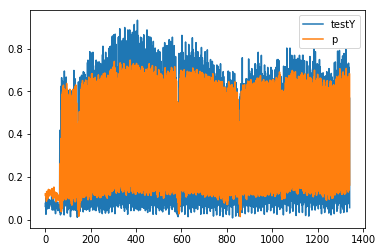

In [15]:
# p = model.predict(x_test)


# In[75]:


import matplotlib.pyplot as plt

plt.plot(y_test)
plt.plot(p)
plt.legend(['testY', 'p'], loc='upper right')
plt.show()